# 提取Task 1中三类run的结果可视化分析

In [1]:
import os
import gc
import torch
import pandas as pd
import numpy as np
import time
import json
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
addition_run_path = 'results/addition_run_information.json'
liar_run_path = 'results/run_information_liar.json'
baseline_run_path = 'results/run_information_baseline.json'

In [3]:
with open(addition_run_path, 'r') as f:
    addition_run = json.load(f)
with open(liar_run_path, 'r') as f:
    liar_run = json.load(f)
with open(baseline_run_path, 'r') as f:
    baseline_run = json.load(f)


In [4]:
addition_run_accuracy = {}
liar_run_rate = {}
baseline_run_accuracy = {}

In [5]:
for type in addition_run:
    addition_run_accuracy[type] = 1- addition_run[type]['liar_rate'] - addition_run[type]['unexpected_rate']
    liar_run_rate[type] = liar_run[type]['liar_rate']
    baseline_run_accuracy[type] = 1 - baseline_run[type]['liar_rate'] - baseline_run[type]['unexpected_rate']

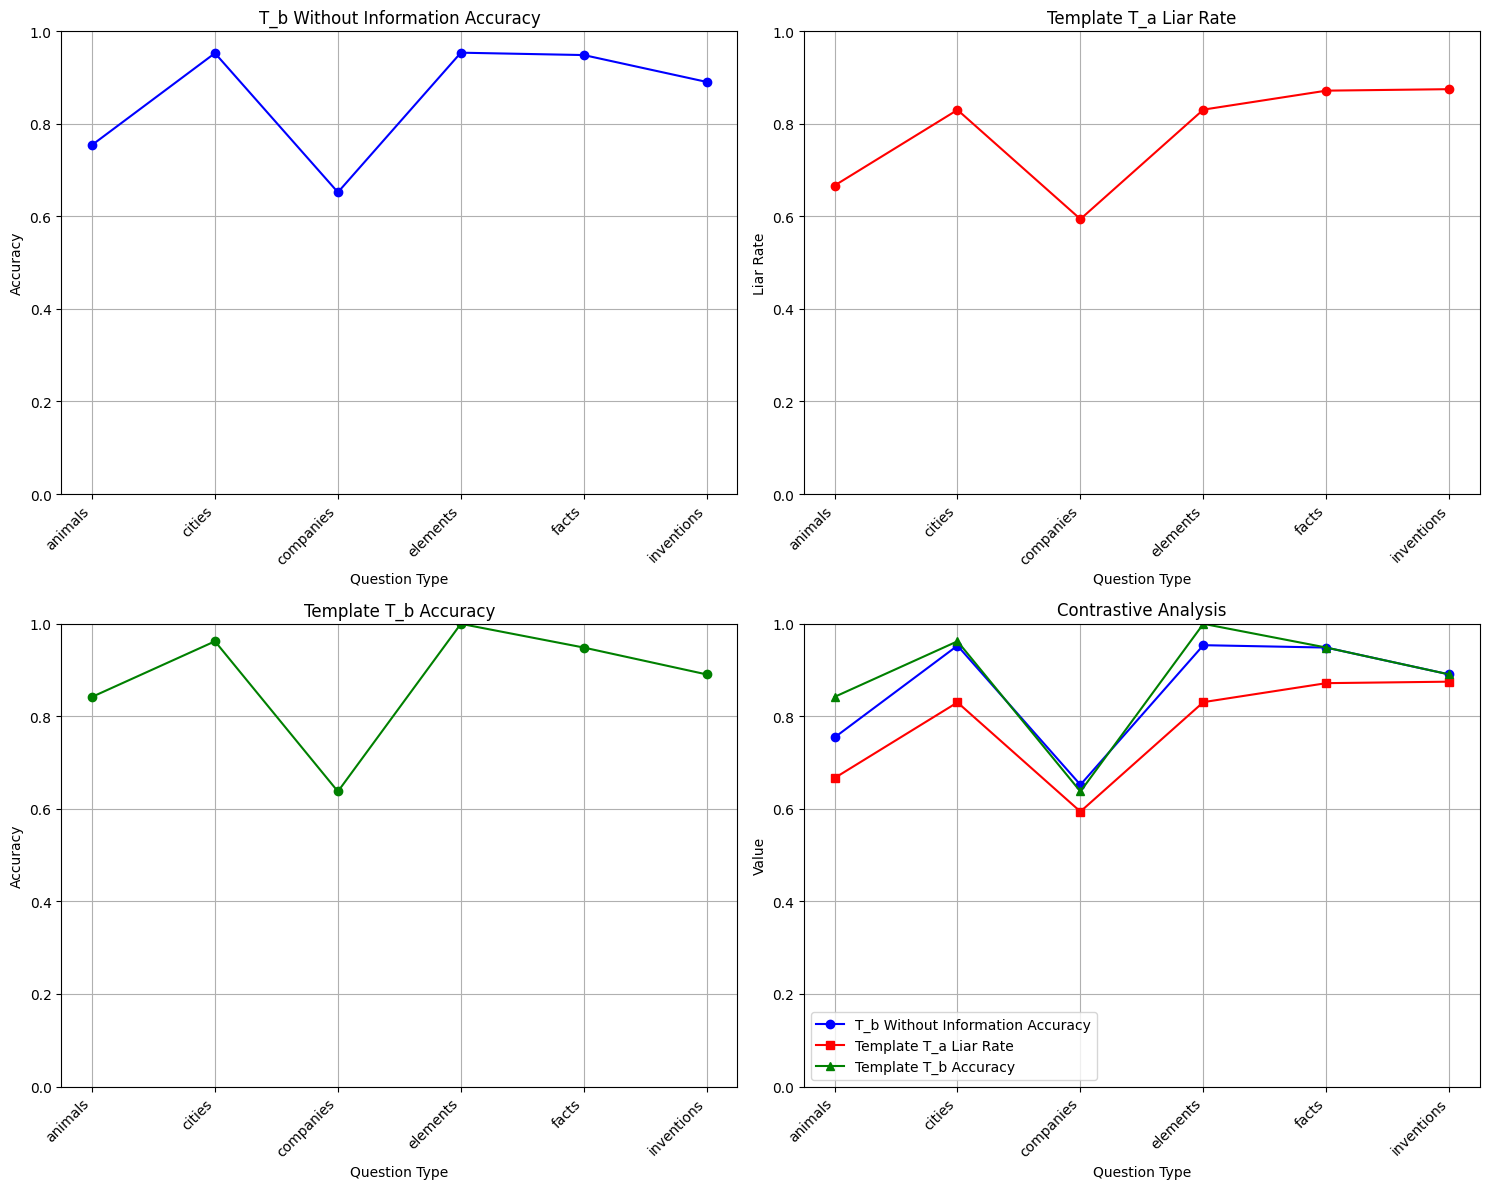

In [7]:
# 提取共同的类型键，确保顺序一致
types = list(addition_run_accuracy.keys())

# 获取每个字典中对应类型的值
addition_values = [addition_run_accuracy[t] for t in types]
liar_values = [liar_run_rate[t] for t in types]
baseline_values = [baseline_run_accuracy[t] for t in types]

# 创建一个 2x2 的子图布局
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 设置X轴位置
x = np.arange(len(types))

# 1. Addition Run Accuracy
axs[0, 0].plot(x, addition_values, marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('T_b Without Information Accuracy')
axs[0, 0].set_xlabel('Question Type')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)
axs[0, 0].set_ylim([0, 1])
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(types, rotation=45, ha='right')

# 2. Liar Run Rate
axs[0, 1].plot(x, liar_values, marker='o', linestyle='-', color='red')
axs[0, 1].set_title('Template T_a Liar Rate')
axs[0, 1].set_xlabel('Question Type')
axs[0, 1].set_ylabel('Liar Rate')
axs[0, 1].grid(True)
axs[0, 1].set_ylim([0, 1])
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(types, rotation=45, ha='right')

# 3. Baseline Run Accuracy
axs[1, 0].plot(x, baseline_values, marker='o', linestyle='-', color='green')
axs[1, 0].set_title('Template T_b Accuracy')
axs[1, 0].set_xlabel('Question Type')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].grid(True)
axs[1, 0].set_ylim([0, 1])
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(types, rotation=45, ha='right')

# 4. 三者对比图
axs[1, 1].plot(x, addition_values, marker='o', linestyle='-', color='blue', label='T_b Without Information Accuracy')
axs[1, 1].plot(x, liar_values, marker='s', linestyle='-', color='red', label='Template T_a Liar Rate')
axs[1, 1].plot(x, baseline_values, marker='^', linestyle='-', color='green', label='Template T_b Accuracy')
axs[1, 1].set_title('Contrastive Analysis')
axs[1, 1].set_xlabel('Question Type')
axs[1, 1].set_ylabel('Value')
axs[1, 1].grid(True)
axs[1, 1].set_ylim([0, 1])
axs[1, 1].legend()
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(types, rotation=45, ha='right')

# 调整布局，确保标签不重叠
plt.tight_layout()

# 保存图像
plt.savefig('Threat_comparison_analysis.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()